## UMC 301 (AUG 2024)

# Tutorial on Visualising Convolution Neural Networks

## Learning Objective

* Visualizing convnet filters
* Visualizing activation maps
* Occlusion Experiment
* GRAD-Class Activation Map(GRADCAM)

## Import Libraries

In [1]:
# Import necessary functions

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from PIL import Image

## Visualizing Filters/Kernals

In [2]:
# Loading pretrained model
alexnet = models.alexnet(pretrained=True)

# Print Layers in the model
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [3]:
# Function to plot the filters
def plot_filters_rgb(t, num_filters=64):

    # Normalize the weights for visualization
    t_min = t.min()
    t_max = t.max()
    t = (t - t_min) / (t_max - t_min)
    
    num_channels = t.shape[1]  # Number of channels
    fig, axarr = plt.subplots(8, 8, figsize=(12, 12)) # Subplots
    
    for idx in range(num_filters):
        ax = axarr[idx // 8, idx % 8] # Index
        
        if num_channels == 3:  # For RGB filters, display all three channels
              # Convert from (C, H, W) to (H, W, C)
              # Display RGB image

              # YOUR CODE HERE
            img = t[idx].numpy().transpose(1, 2, 0)
            ax.imshow(img)

        else:  # For grayscale filters
            
            img = t[idx, 0].numpy()
            ax.imshow(img, cmap="gray")
        
        ax.axis('off')
    
    plt.show()

Visualizing first 64 filters of AlexNet...


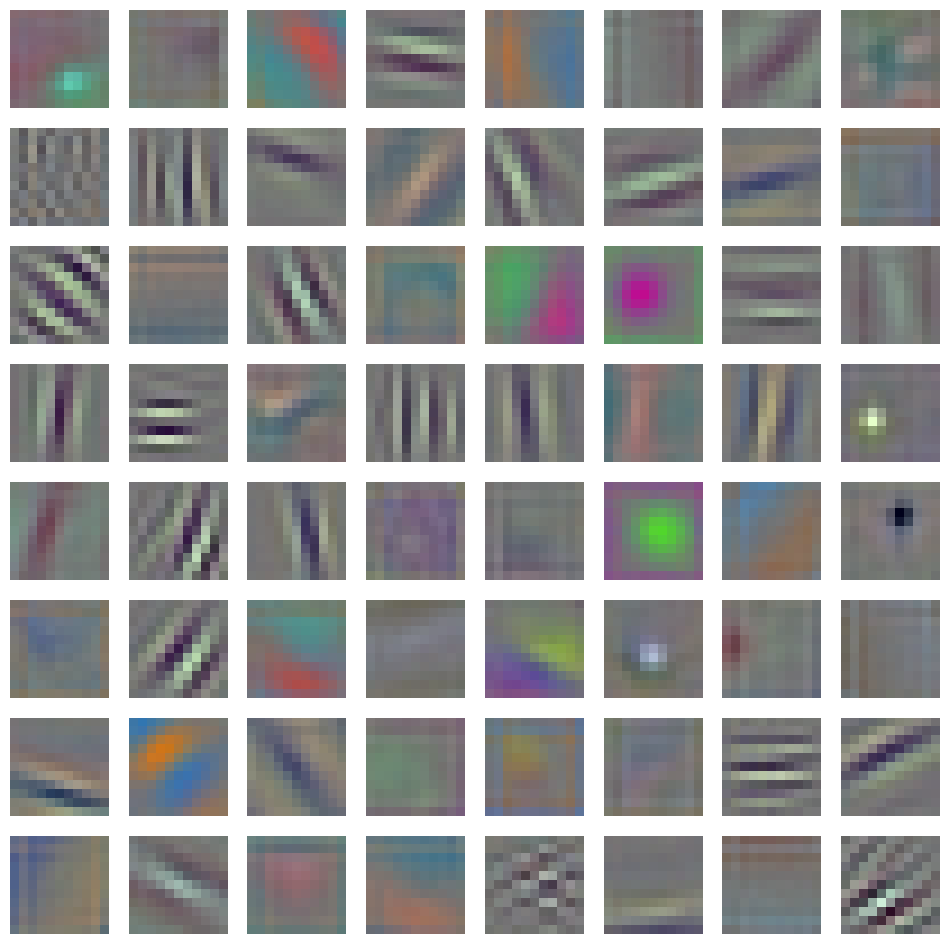

Visualizing first 64 filters of ResNet18...


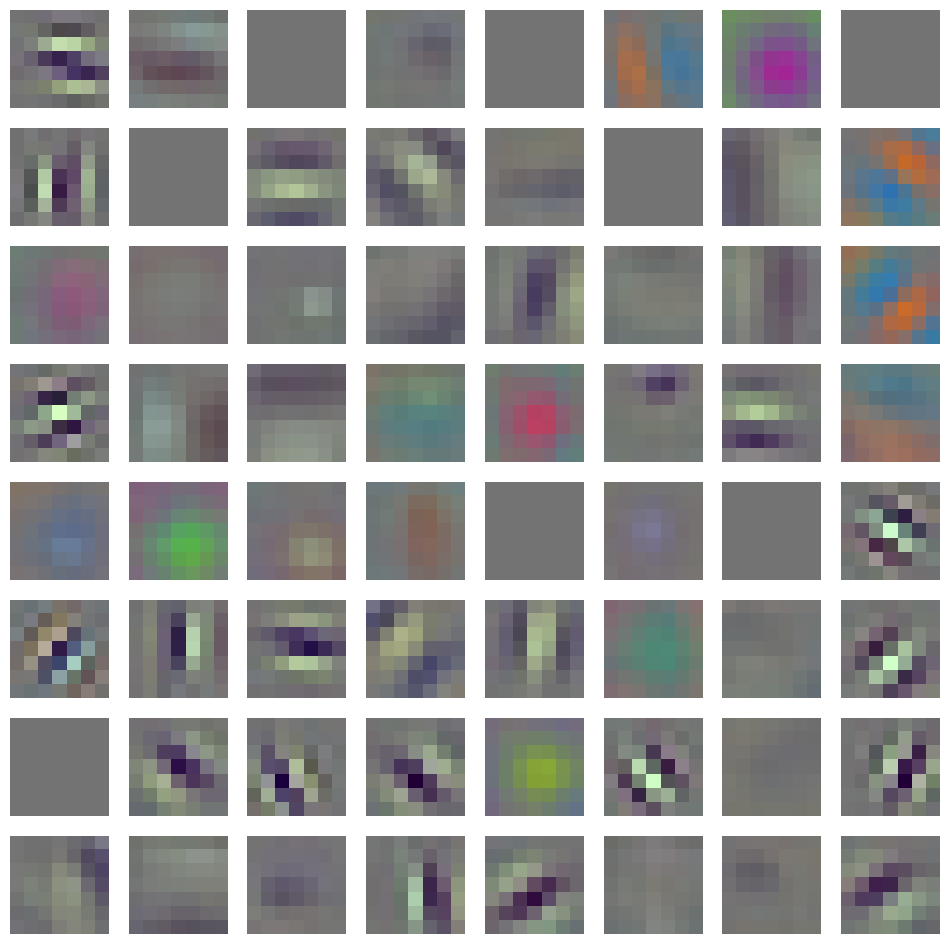

Visualizing first 64 filters of ResNet101...


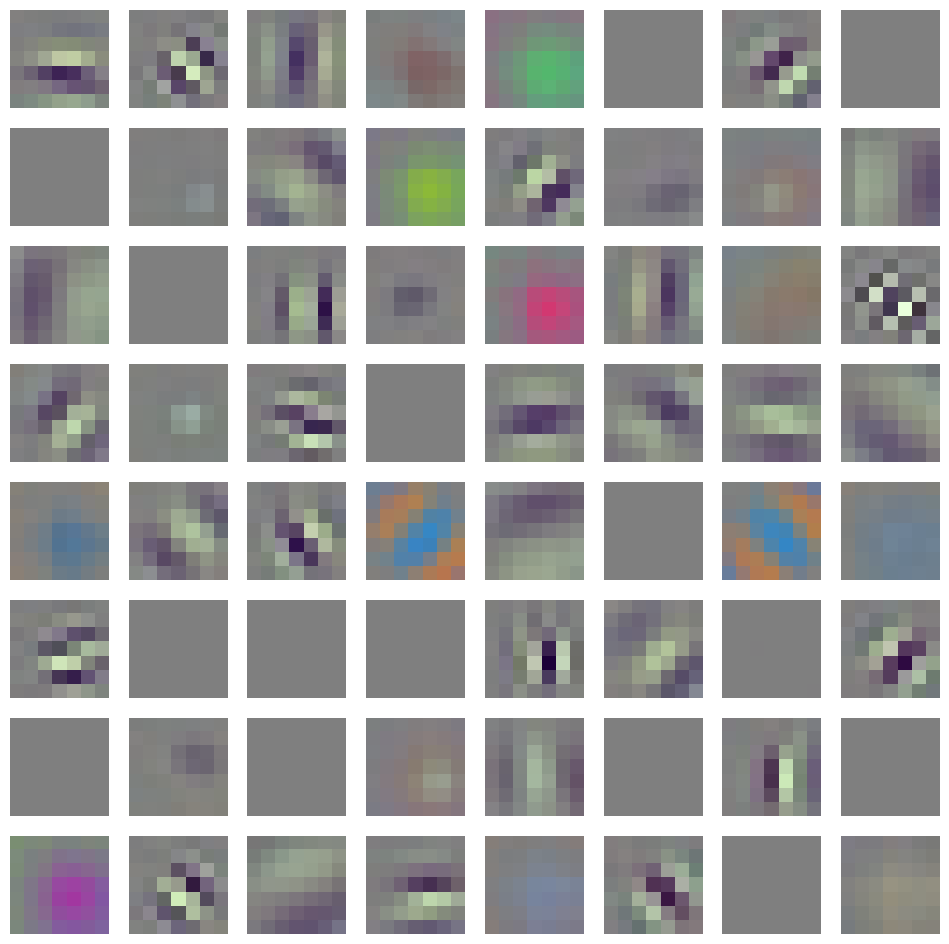

In [4]:
# Function to get the first layer filters
def visualize_first_layer(model, model_name):
    if isinstance(model, models.AlexNet):
        filters = model.features[0].weight.data  # First conv layer in AlexNet
    elif isinstance(model, models.ResNet):
        filters = model.conv1.weight.data  # First conv layer in ResNet and DenseNet
    else:
        raise ValueError("Unsupported model type")
    
    print(f"Visualizing first 64 filters of {model_name}...")
    plot_filters_rgb(filters, num_filters=64)

# Load pre-trained models
resnet18 = models.resnet18(pretrained=True)

# YOUR CODE # lOAD RESNET18, RESNET101
resnet101 = models.resnet101(pretrained=True)

# Visualize filters from the first convolutional layer
visualize_first_layer(alexnet, "AlexNet")
visualize_first_layer(resnet18, "ResNet18")
visualize_first_layer(resnet101, "ResNet101")

# YOUR CODE # VISULAISE RESNET18, RESNET101

In [5]:
# Model architecture for densenet
densenet121 = models.densenet121(pretrained=True)
print(densenet121)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

torch.Size([64, 3, 7, 7])


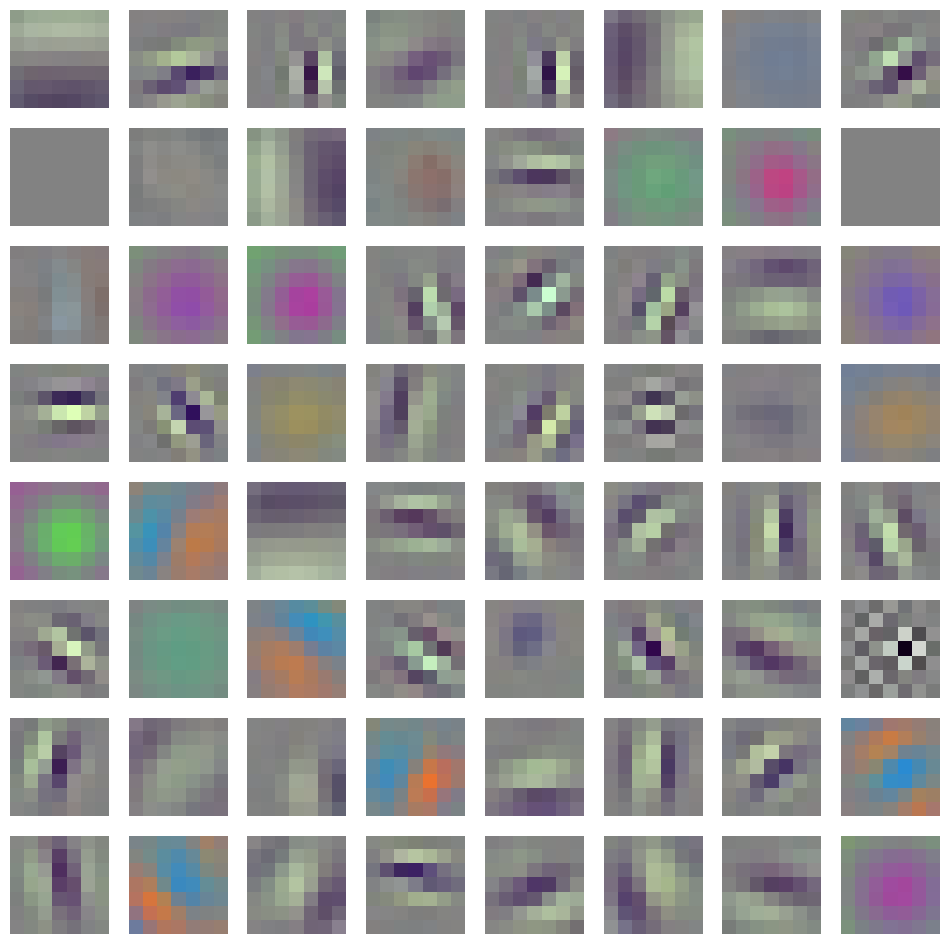

In [6]:
# Visualize filters from the first convolutional layer
# YOUR CODE TO VISULAISE FIRST LAYER FILTER
filter = densenet121.features.conv0.weight.data
print(filter.shape)
plot_filters_rgb(filter, num_filters=64)

Summary:   
Consistent First-Layer Filters Across Models:

* Training different models (e.g., AlexNet, ResNet18) on the same dataset (ImageNet) results in similar first-layer filters.

* These filters primarily learn low-level image processing features such as edges, textures, and simple patterns.

Divergence in Higher Layers:

* In the higher layers of the network, filters become more specialized and diverse.
* The vast variety of 1,000 objects in ImageNet leads to less similarity between higher-layer filters across different models.

Specialized Features with Focused Datasets:

* When models are trained on more focused datasets (e.g., human faces), higher-layer filters can capture more specific and detailed features.
* Examples of such specialized features include noise patterns, eye structures, and other intricate details relevant to the specific objects in the dataset.

Implications for Model Training:

* Understanding the behavior of filters at different layers can help in designing and fine-tuning models for specific tasks.
* Specialized datasets can enhance a model’s ability to recognize and process detailed features pertinent to the target domain

## Visualising Activation maps

In [7]:
# Load the pre-trained VGG16 model  to gpu
model = models.vgg19(pretrained=True) # We will consider this model for all remaining experiments
model.eval()

# Define transform
transform = transforms.Compose([transforms.Resize((224, 224)), 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Define a function to load and preprocess the image
def preprocess_image(image_path):   # Same Preprocessing for all experiments

    # Define transform
    preprocess = transforms.Compose([
        transforms.Resize((254,254)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


    image = Image.open(image_path).convert('RGB')
    image = preprocess(image)   # Data preprocessing
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Load and preprocess the image


# YOUR CODE ADD YOUR IMAGE PATH
image_path = './download.jpeg'

input_image = preprocess_image(image_path=image_path) # Same input for all other experiments

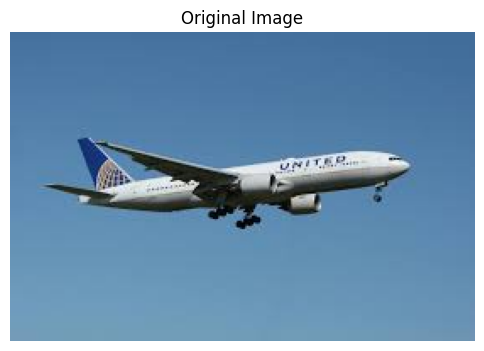

In [8]:
# Plot the original image
plt.figure(figsize=(6, 6))
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.title('Original Image')
plt.show()

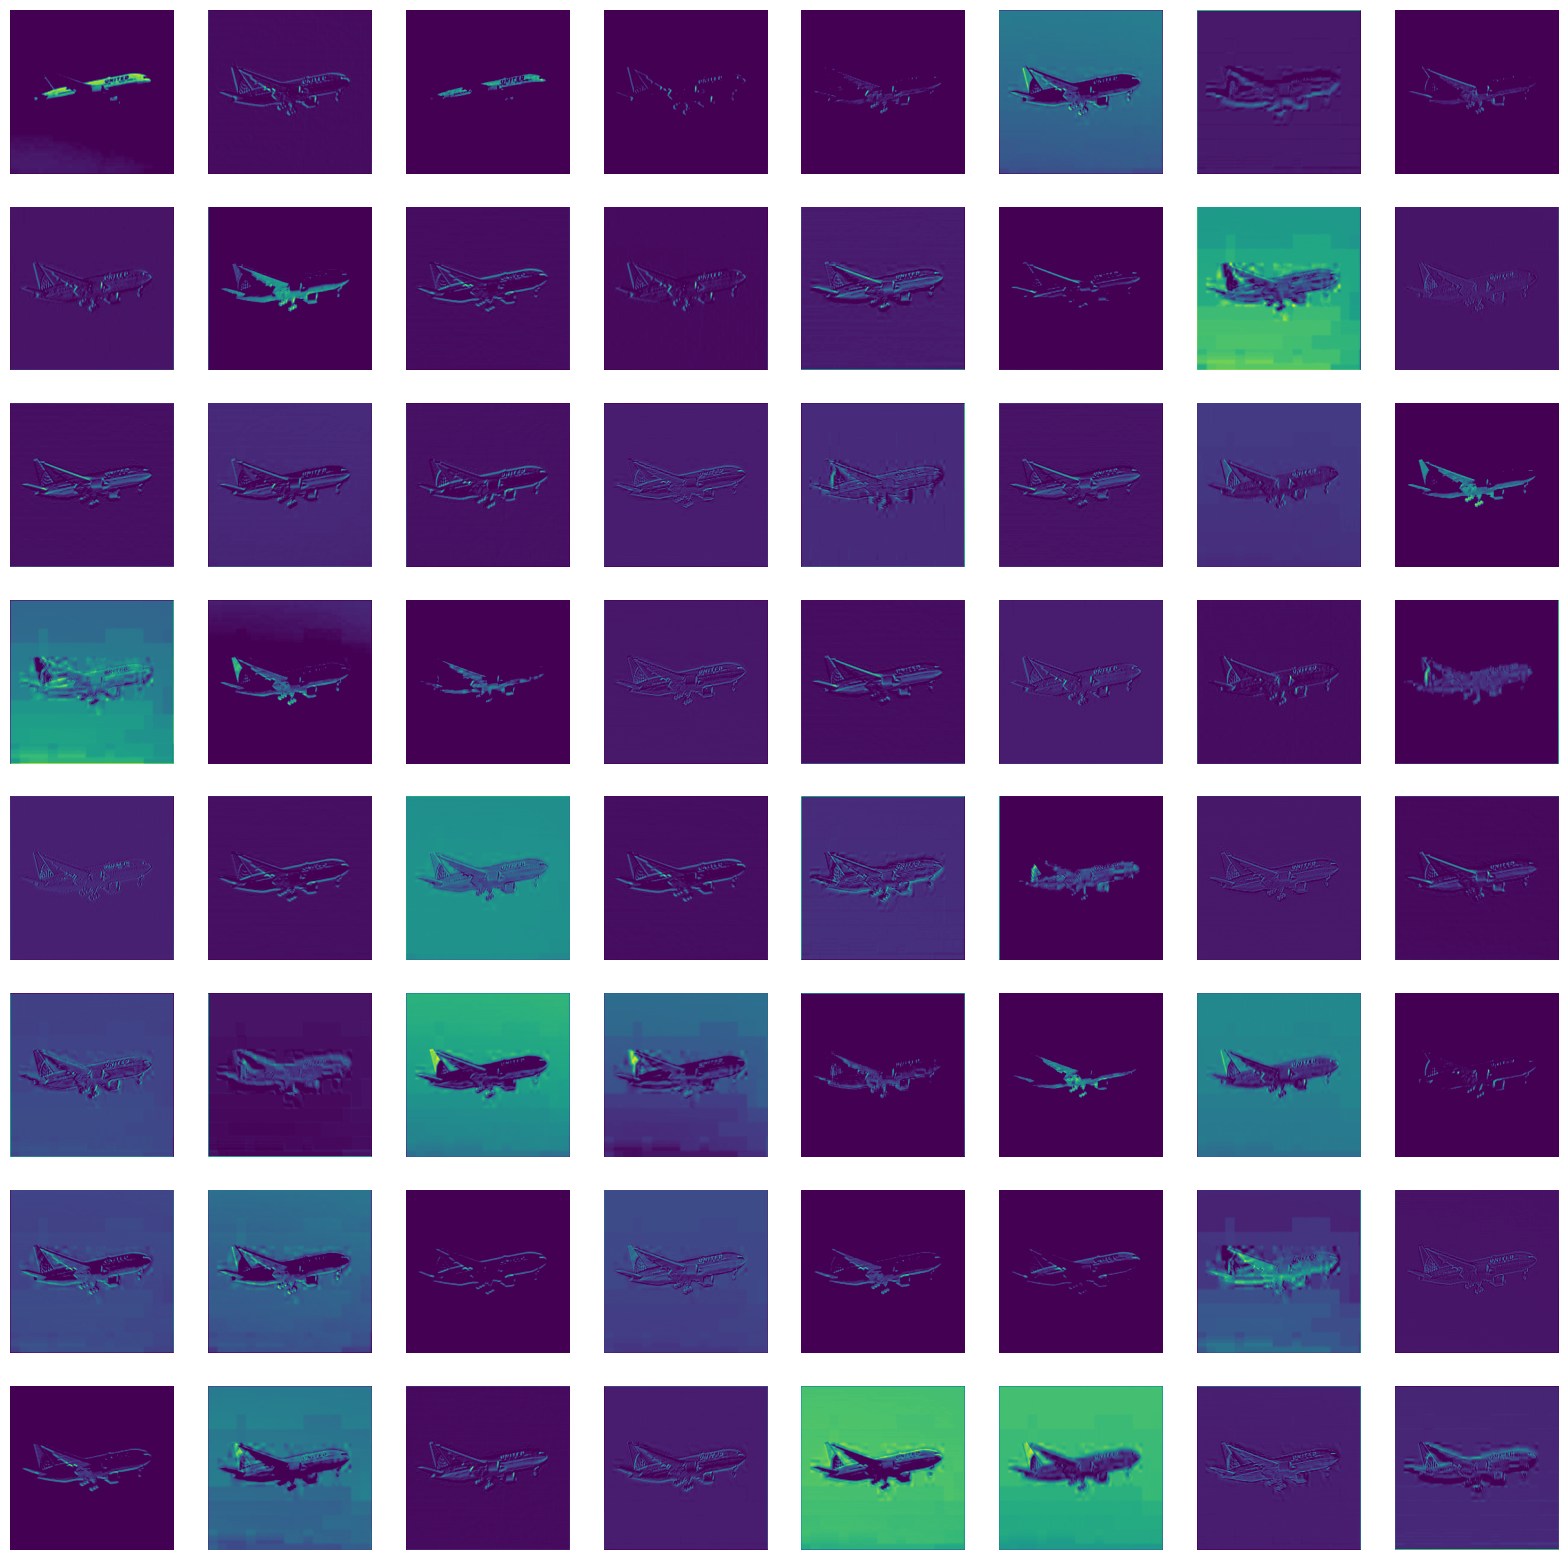

In [9]:
# Define a hook function to capture activations
def hook_fn(module, input, output):
    activations.append(output)

# List to store activation maps
activations = []

# Register hooks to capture activations from all convolutional layers
hooks = []
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        hook = module.register_forward_hook(hook_fn)
        hooks.append(hook)

# Forward pass through the network
with torch.no_grad():
    _ = model(input_image)

# Remove hooks
for hook in hooks:
    hook.remove()

# Define a function to visulaise activation maps
def visualize_activations(activation_maps, num_columns=8):
    num_layers = len(activation_maps)
    
    for i in range(num_layers):
        activation = activation_maps[i]
        num_filters = activation.size(1)
        
        # Calculate the number of rows needed
        num_rows = (num_filters + num_columns - 1) // num_columns
        
        fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))
        axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier
        
        for j in range(num_filters):
            
            # YOUR CODE HERE
            ax = axes[j]
            ax.imshow(activation[0, j].cpu(), cmap='viridis')
            ax.axis('off')
        
        # Turn off any remaining unused axes
        for k in range(num_filters, len(axes)):
            axes[k].axis('off')
        
        plt.show()

# Visualize activation maps from the first convolutional layer
visualize_activations(activations[:1])


In [19]:
activations[0].shape

torch.Size([1, 64, 254, 254])

In [15]:
activations[:1][0].shape

torch.Size([1, 64, 254, 254])

In [10]:
for layer in activations:
    print(layer.shape)

torch.Size([1, 64, 254, 254])
torch.Size([1, 64, 254, 254])
torch.Size([1, 128, 127, 127])
torch.Size([1, 128, 127, 127])
torch.Size([1, 256, 63, 63])
torch.Size([1, 256, 63, 63])
torch.Size([1, 256, 63, 63])
torch.Size([1, 256, 63, 63])
torch.Size([1, 512, 31, 31])
torch.Size([1, 512, 31, 31])
torch.Size([1, 512, 31, 31])
torch.Size([1, 512, 31, 31])
torch.Size([1, 512, 15, 15])
torch.Size([1, 512, 15, 15])
torch.Size([1, 512, 15, 15])
torch.Size([1, 512, 15, 15])


## Class Activation Map(CAM)

### Experiment 1: Occlusion Experiments

In [10]:
#running inference on the images without occlusion

#vgg16 pretrained model
outputs = model(input_image)
print(outputs.shape)

#passing the outputs through softmax to interpret them as probability
outputs = nn.functional.softmax(outputs, dim = 1)

#getting the maximum predicted label
prob_no_occ, pred = torch.max(outputs.data, 1)

#get the first item
prob_no_occ = prob_no_occ[0].item()

print(prob_no_occ)

torch.Size([1, 1000])
0.9910284876823425


In [11]:
outputs.shape

torch.Size([1, 1000])

In [12]:
# Load imagenet class names for class labels
import json
class_idx = json.load(open("imagenet_class_index.json"))

In [13]:
# Get the class label
label = class_idx[str(pred.item())][1]
print(label)

airliner


In [14]:
from tqdm import tqdm

In [15]:
#custom function to conduct occlusion experiments
def occlusion(model, image, label, occ_size = 100, occ_stride = 2, occ_pixel = 0.5):
  
    #get the width and height of the image
    width, height = image.shape[-2], image.shape[-1]
    print(image.shape)
    #setting the output image width and height
    output_height = int(np.ceil((height)/occ_stride))
    output_width = int(np.ceil((width)/occ_stride))
  
    #create a white image of sizes we defined
    heatmap = torch.zeros((output_height, output_width))
    
    #iterate all the pixels in each column
    for h in tqdm(range(0, height, occ_stride), desc='Progress', leave=True, colour='green'):
        for w in tqdm(range(0, width, occ_stride), desc='Progress', leave=True, colour='red'):
            
            # YOUR CODE HERE
            # SLIDE ACROSS INPUT
            w_start, w_end = w, min(width, w+occ_size)
            h_start, h_end = h, min(height, h+occ_size)
            
            
            
            input_image = image.clone().detach()
            
            #replacing all the pixel information in the image with occ_pixel(grey) in the specified location
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel
            
            #run inference on modified image
            output = model(input_image)
            output = nn.functional.softmax(output, dim=1)
            prob = output.tolist()[0][label]
            
            #setting the heatmap location to probability value
            heatmap[h//occ_stride, w//occ_stride] = prob 

    return heatmap

In [16]:
heatmap = occlusion(model, input_image, pred[0].item(), 60, 14, 0)

torch.Size([1, 3, 254, 254])


Progress: 100%|██████████| 19/19 [00:56<00:00,  2.97s/it]


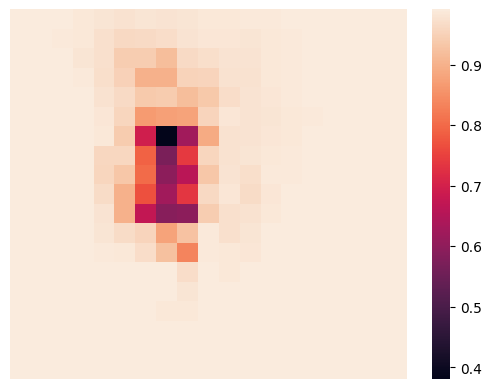

In [17]:
# Displaying the image using seaborn heatmap and also setting the maximum value of gradient to probability
imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)
figure = imgplot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

### Experiment 2 : GRADCAM

In [18]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [25]:
for layers in model.features:
    if type(layers) == nn.Conv2d:
        print(layers)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), pa

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

def visualize_gradcam(model: models.VGG, image):
    
    # Forward pass
    pred = model(image)
    index = pred.argmax(dim=1).item()
    print("The max probability is of class", index)
    
    # Backward pass to get gradients
    pred[:, index].backward()
    
    # Get the gradient of the output with respect to the parameters of the model
    gradients = model.get_activations_gradient()
    
    # Pool the gradients across the channels
    pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])
    print(pooled_gradients.shape)

    # Get the activations of the last convolutional layer
    activations = model.get_activations(image).detach()
    print(activations.shape)

    # Weight the channels by corresponding gradients
    for i in range(activations.shape[1]):
        activations[:, i, :, :] *= pooled_gradients[i]

    # Average the channels of the activations
    heatmap = torch.mean(activations, dim=1).squeeze()
    heatmap = np.maximum(heatmap.cpu(), 0)
    
    # Normalize the heatmap
    heatmap /= torch.max(heatmap)
    #print(heatmap.shape)

    plt.matshow(heatmap.squeeze())

    heatmap = heatmap.numpy()
    
    #plt.matshow(heatmap.squeeze())

    img = cv2.imread('download.jpeg')
    if img is None:
        raise Exception("Could not read the image")
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    
    # Apply color map to the heatmap
    heatmap_colored = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap_colored, 0.4, 0)

    # Convert BGR to RGB (OpenCV uses BGR, matplotlib uses RGB)
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    # Display using Matplotlib (often provides a better viewing experience)
    plt.figure(figsize=(10, 8))
    plt.imshow(superimposed_img_rgb)
    plt.axis('off')
    plt.title('Heatmap Overlay')
    plt.show()

In [29]:
import torch
import torch.nn as nn
import torchvision.models as models

class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        
        # get the pretrained VGG19 network
        self.vgg = models.vgg19(pretrained=True)
        
        # dissect the network to access its last convolutional layer
        self.features_conv = self.vgg.features[:36]
        
        # get the max pool of the features stem
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
        # get the classifier of the vgg19
        self.classifier = self.vgg.classifier
        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)
        
        # register the hook
        h = x.register_hook(self.activations_hook)
        
        # apply the remaining pooling
        x = self.max_pool(x)
        x = x.view((1, -1))
        x = self.classifier(x)
        return x
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return self.gradients
    
    # method for the activation extraction
    def get_activations(self, x):
        return self.features_conv(x)

In [30]:
# initialize the VGG model
vgg = VGG()

# set the evaluation mode
vgg.eval()

# get the most likely prediction of the model
pred = vgg(input_image).argmax(dim=1)


The max probability is of class 404
torch.Size([512])
torch.Size([1, 512, 15, 15])


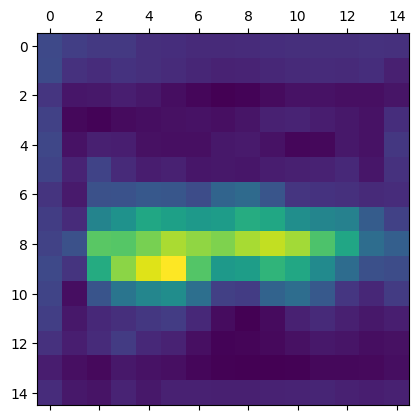

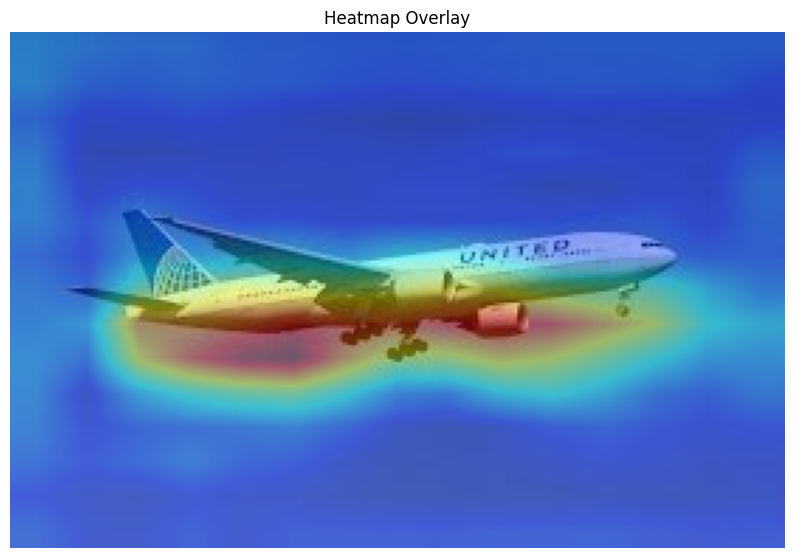

In [31]:
visualize_gradcam(vgg, input_image)

## Additional Visualisation Techniques


* Visualise Representation Space
* Visualise Maximally Activating Image Patches(Dropout)